In [34]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [6]:
# Load dataset
data = pd.read_csv('train.csv')

In [21]:
# Basic dataset overview
print("Dataset Overview:")
print(data.head())
print(data.info())
print("Missing Values in Each Column:")
print(data.isnull().sum())

Dataset Overview:
   Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0            221             232            148  ...            0   
1       

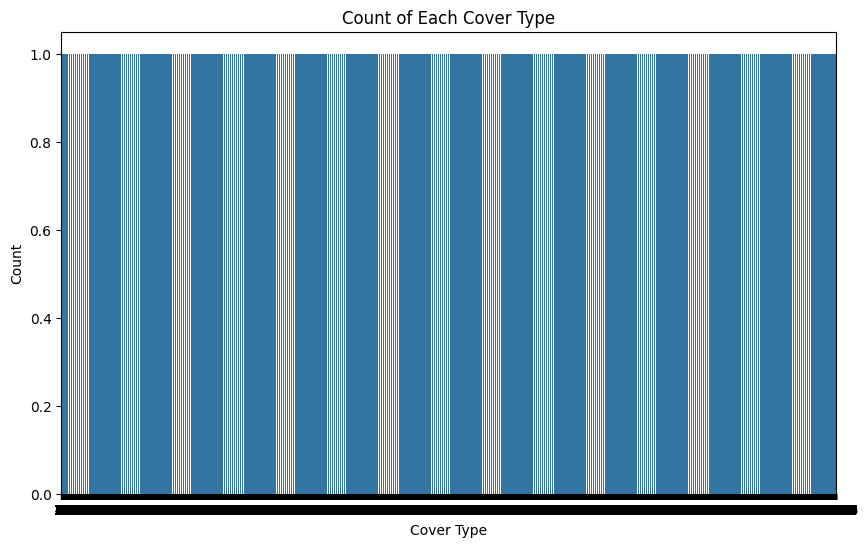

In [22]:
# EDA: Visualizations
plt.figure(figsize=(10, 6))
sns.countplot(data['Cover_Type'])
plt.title('Count of Each Cover Type')
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.show()

In [23]:
# Split dataset
X = data.drop('Cover_Type', axis=1)
y = data['Cover_Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
# Convert X_train and y_train to DataFrame for saving
X_train_df = pd.DataFrame(X_train, columns=X.columns)  # Use actual feature names
y_train_df = pd.DataFrame(y_train, columns=['Cover_Type'])  # Target column

In [27]:
# Concatenate X_train and y_train for saving in a single file
train_data = pd.concat([X_train_df, y_train_df], axis=1)

# Save the training data to 'splitted_train.csv'
train_data.to_csv('nw_train.csv', index=False)

# Load the new training dataset from 'splitted_train.csv'
new_train_data = pd.read_csv('nw_train.csv')

In [28]:
# Split new training dataset into features (X) and target (y)
X_new_train = new_train_data.drop('Cover_Type', axis=1)  # Feature variables
y_new_train = new_train_data['Cover_Type']  # Target variable

In [29]:
# Simple Model Test (Random Forest)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
predictions = rf_model.predict(X_test)

In [39]:
# Step 7: Evaluate the model on the training data
train_predictions = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 1.0


In [40]:
# Step 8: Evaluate the model on the test data
test_predictions = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Testing Accuracy:", test_accuracy)



Testing Accuracy: 0.8699294532627866


In [41]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)

Classification Report:
              precision    recall  f1-score   support

           1       0.78      0.78      0.78       620
           2       0.81      0.69      0.75       658
           3       0.86      0.82      0.84       645
           4       0.93      0.98      0.95       661
           5       0.89      0.95      0.92       650
           6       0.86      0.89      0.87       650
           7       0.95      0.97      0.96       652

    accuracy                           0.87      4536
   macro avg       0.87      0.87      0.87      4536
weighted avg       0.87      0.87      0.87      4536



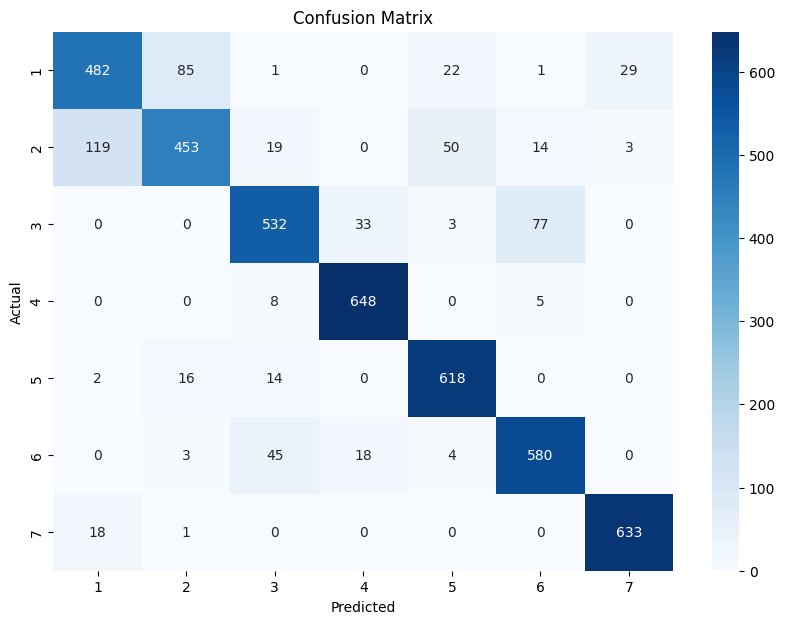

In [42]:
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 8), yticklabels=range(1, 8))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [32]:
# Save the test data to 'test.csv'
X_test_df = pd.DataFrame(X_test, columns=X.columns)  # Convert test features to DataFrame
y_test_df = pd.DataFrame(y_test, columns=['Cover_Type'])  # Convert test target to DataFrame
test_data = pd.concat([X_test_df, y_test_df], axis=1)  # Concatenate test data

In [33]:
# Save the test data to 'test.csv'
test_data.to_csv('test.csv', index=False)